In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import keras
from sklearn.preprocessing import LabelEncoder
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras import models
from keras import regularizers
from keras.layers import Dropout

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to train and test data folders
train_data_dir = "C:/Users/alfon/Downloads/DSP Project/Datasets/train"
test_data_dir = "C:/Users/alfon/Downloads/DSP Project/Datasets/test"

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Define data augmentation and scaling
train_datagen = ImageDataGenerator(
        rescale=1./255,     # Scale pixel values to [0,1]
        shear_range=0.2,    # Randomly apply shearing
        zoom_range=0.2,     # Randomly zoom in/out
        horizontal_flip=True) # Randomly flip images horizontally

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess train data
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

# Load and preprocess test data
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 3096 images belonging to 48 classes.
Found 751 images belonging to 48 classes.


In [3]:
import os

num_classes = len(os.listdir(train_data_dir))

num_classes

48

In [4]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 48)                8

In [5]:
# Build your CNN model and train on the data
baseline_model = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=2,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size)

Epoch 1/2
96/96 [==============================] - 92s 956ms/step - loss: 4.4957 - accuracy: 0.0790 - val_loss: 3.5937 - val_accuracy: 0.0774
Epoch 2/2
96/96 [==============================] - 91s 949ms/step - loss: 3.4841 - accuracy: 0.1270 - val_loss: 3.4090 - val_accuracy: 0.1671


1/1 [==============================] - 0s 142ms/step


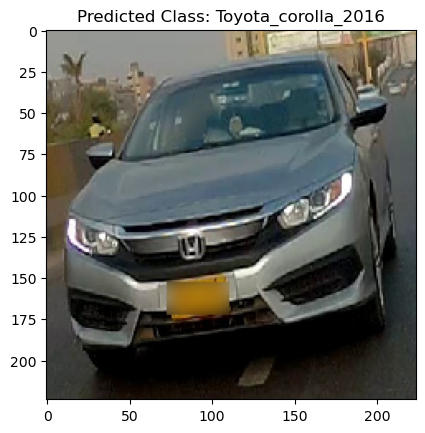

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Choose an image from the test set for prediction
img_path = "C:/Users/alfon/Downloads/DSP Project/1397_old.jpg"  # Replace with the actual file path

# Load the image, resize it to the model's input dimensions, and preprocess it
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to [0,1]

# Make a prediction and display the result

prediction = model.predict(img_array)
class_names = sorted(os.listdir('C:/Users/alfon/Downloads/DSP Project/Datasets/test'))
predicted_class_index = np.argmax(prediction, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Display the image along with the predicted and actual classes
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()

## **Improving the Accuracy of the Model**

In [7]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# compile model
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# learning rate schedule
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)



In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define Callbacks
checkpoint = ModelCheckpoint('model_best_weights.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)


In [9]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,  # Increase the number of epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

Epoch 1/50
96/96 [==============================] - ETA: 0s - loss: 4.3642 - accuracy: 0.0352
Epoch 1: val_accuracy improved from -inf to 0.04620, saving model to model_best_weights.h5
96/96 [==============================] - 150s 2s/step - loss: 4.3642 - accuracy: 0.0352 - val_loss: 4.3680 - val_accuracy: 0.0462 - lr: 0.0010
Epoch 2/50
96/96 [==============================] - ETA: 0s - loss: 4.0386 - accuracy: 0.0604
Epoch 2: val_accuracy improved from 0.04620 to 0.07065, saving model to model_best_weights.h5
96/96 [==============================] - 146s 2s/step - loss: 4.0386 - accuracy: 0.0604 - val_loss: 4.8637 - val_accuracy: 0.0707 - lr: 0.0010
Epoch 3/50
96/96 [==============================] - ETA: 0s - loss: 3.8244 - accuracy: 0.0829
Epoch 3: val_accuracy did not improve from 0.07065
96/96 [==============================] - 141s 1s/step - loss: 3.8244 - accuracy: 0.0829 - val_loss: 4.3136 - val_accuracy: 0.0163 - lr: 0.0010
Epoch 4/50
96/96 [==============================] - E

96/96 [==============================] - 135s 1s/step - loss: 1.2545 - accuracy: 0.6518 - val_loss: 1.5256 - val_accuracy: 0.6236 - lr: 0.0010
Epoch 28/50
96/96 [==============================] - ETA: 0s - loss: 1.2247 - accuracy: 0.6501
Epoch 28: val_accuracy did not improve from 0.62364
96/96 [==============================] - 134s 1s/step - loss: 1.2247 - accuracy: 0.6501 - val_loss: 1.7813 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 29/50
96/96 [==============================] - ETA: 0s - loss: 1.1902 - accuracy: 0.6651
Epoch 29: val_accuracy improved from 0.62364 to 0.63723, saving model to model_best_weights.h5
96/96 [==============================] - 135s 1s/step - loss: 1.1902 - accuracy: 0.6651 - val_loss: 1.3667 - val_accuracy: 0.6372 - lr: 0.0010
Epoch 30/50
96/96 [==============================] - ETA: 0s - loss: 1.1531 - accuracy: 0.6753
Epoch 30: val_accuracy did not improve from 0.63723
96/96 [==============================] - 134s 1s/step - loss: 1.1531 - accuracy: 0.6753

1/1 [==============================] - 0s 39ms/step


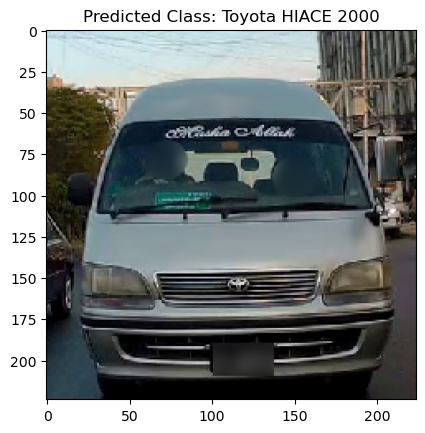

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Choose an image from the test set for prediction
img_path = "C:/Users/alfon/Downloads/DSP Project/5405.jpg"  # Replace with the actual file path

# Load the image, resize it to the model's input dimensions, and preprocess it
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to [0,1]

# Make a prediction and display the result

prediction = model.predict(img_array)
class_names = sorted(os.listdir('C:/Users/alfon/Downloads/DSP Project/Datasets/test'))
predicted_class_index = np.argmax(prediction, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Display the image along with the predicted and actual classes
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()

1/1 [==============================] - 0s 30ms/step


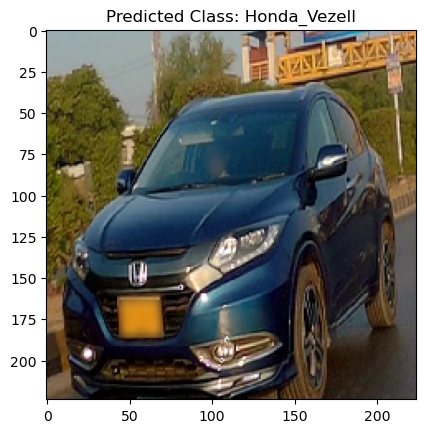

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Choose an image from the test set for prediction
img_path = "C:/Users/alfon/Downloads/DSP Project/4872.jpg"  # Replace with the actual file path

# Load the image, resize it to the model's input dimensions, and preprocess it
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to [0,1]

# Make a prediction and display the result

prediction = model.predict(img_array)
class_names = sorted(os.listdir('C:/Users/alfon/Downloads/DSP Project/Datasets/test'))
predicted_class_index = np.argmax(prediction, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Display the image along with the predicted and actual classes
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()

1/1 [==============================] - 0s 32ms/step


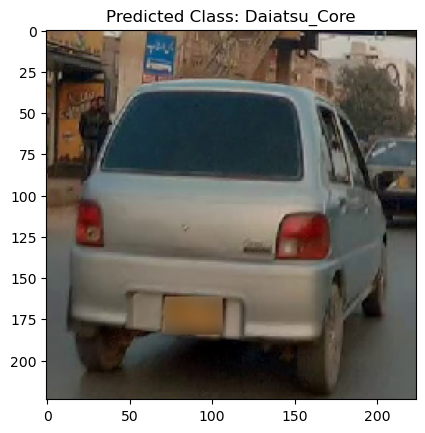

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Choose an image from the test set for prediction
img_path = "C:/Users/alfon/Downloads/DSP Project/2779.jpg"  # Replace with the actual file path

# Load the image, resize it to the model's input dimensions, and preprocess it
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to [0,1]

# Make a prediction and display the result

prediction = model.predict(img_array)
class_names = sorted(os.listdir('C:/Users/alfon/Downloads/DSP Project/Datasets/test'))
predicted_class_index = np.argmax(prediction, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Display the image along with the predicted and actual classes
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()

1/1 [==============================] - 0s 30ms/step


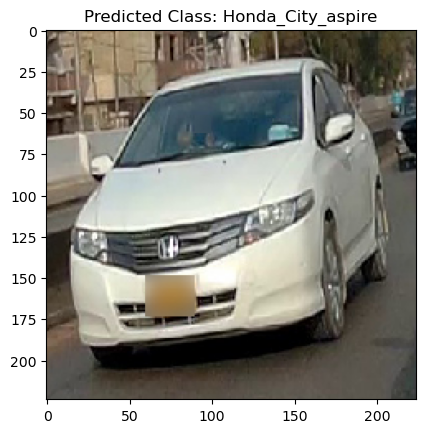

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Choose an image from the test set for prediction
img_path = "C:/Users/alfon/Downloads/DSP Project/901_old.jpg"  # Replace with the actual file path

# Load the image, resize it to the model's input dimensions, and preprocess it
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to [0,1]

# Make a prediction and display the result

prediction = model.predict(img_array)
class_names = sorted(os.listdir('C:/Users/alfon/Downloads/DSP Project/Datasets/test'))
predicted_class_index = np.argmax(prediction, axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Display the image along with the predicted and actual classes
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()